## 5. Проверка однородности выборок

In [6]:
import helper as hp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

In [7]:
my_var = 13
task_5 = '5'

In [8]:
df_1 = hp.get_data(task_5, hp.get_tasks_var(my_var))
df_1

,A5,A8
0,454,382
1,686,508
2,533,415
3,612,498
4,442,350
...,...,...
1068,408,349
1069,535,439
1070,441,383
1071,403,315


In [9]:
data_5_1 = df_1['A5'].to_numpy()
data_5_2 = df_1['A8'].to_numpy()

### 5.1. Критерий знаков

Статистическая гипотеза – H0: F1(x) = F2(x)

In [10]:
stats.wilcoxon(data_5_1, data_5_2)

WilcoxonResult(statistic=0.0, pvalue=4.110515034106515e-177)

In [11]:
def sign_test(vib_X, vib_Y):
    quantity_plus = 0
    length_n = len(vib_X)
    for i in range (len(vib_X)):
        if ((vib_X[i] - vib_Y[i]) > 0):
            quantity_plus += 1
        if ((vib_X[i] - vib_Y[i]) == 0):
            length_n -= 1
    freq_plus = quantity_plus/length_n
    z_value = 2 * np.sqrt(length_n) * (freq_plus - 0.5)
    p_value = 2 * min(stats.norm.cdf(z_value, 0, 1), 1 - stats.norm.cdf(z_value, 0, 1))
    return z_value, p_value

In [12]:
sign_test(data_5_1, data_5_2)

(32.7566787083184, 0.0)

### 5.2. Критерий хи-квадрат

Формула Стерджесса определения числа групп

In [13]:
k_bins=int(1 + math.log2(data_5_1.size))
k_bins

11

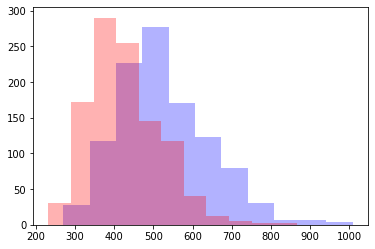

In [49]:
plt.hist(data_5_1, k_bins, density=False,  facecolor='blue', alpha=0.3)
plt.hist(data_5_2, k_bins, density=False,  facecolor='red', alpha=0.3)
plt.show()

Ширина интервалов не равны, след-но, построим новую гистограмму с одинаковыми диапазонами интервалов

In [50]:
left_bord = min(min(data_5_1), min(data_5_2))
right_bord = max(max(data_5_1), max(data_5_2))
print(left_bord, right_bord)

232 1009


In [51]:
span = (right_bord - left_bord)/k_bins #ширина интервала
borders = [left_bord + span*i for i in range(k_bins+1)]

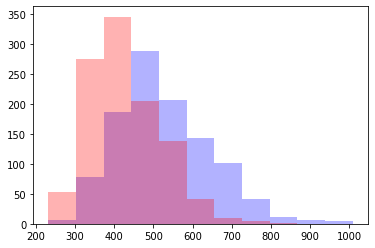

In [52]:
n_1, bins_1, patches_1 = plt.hist(data_5_1, borders, density=False,  facecolor='blue', alpha=0.3)
n_2, bins_2, patches_2 = plt.hist(data_5_2, borders, density=False,  facecolor='red', alpha=0.3)

In [54]:
np.diff(bins_1)[0] # Ширина интервала

70.63636363636363

In [56]:
np.diff(bins_2)[0]

70.63636363636363

In [57]:
n_prob_1 = n_1 / data_5_1.size # отн частота
n_prob_2 = n_2 / data_5_2.size # отн частота
display(n_prob_1, n_prob_2)

array([0.0055918 , 0.07269338, 0.17334576, 0.26840634, 0.19291705,
       0.1332712 , 0.09506058, 0.03821062, 0.01025163, 0.00652377,
       0.00372787])

array([0.04939422, 0.25629077, 0.32152842, 0.19105312, 0.12861137,
       0.03821062, 0.0083877 , 0.00465983, 0.00186393, 0.        ,
       0.        ])

In [65]:
pd.DataFrame({"Нижняя граница" : bins_1[:-1], 
              "Верхняя граница" : bins_1[1:],
              "Частота признака 1" : n_1,
              "Частота признака 2" : n_2,
              "Относит. частота признака 1" : n_prob_1,
              "Относит. частота признака 2" : n_prob_2,
             })

,Нижняя граница,Верхняя граница,Частота признака 1,Частота признака 2,Относит. частота признака 1,Относит. частота признака 2
0,232.000000,302.636364,6.0,53.0,0.005592,0.049394
1,302.636364,373.272727,78.0,275.0,0.072693,0.256291
2,373.272727,443.909091,186.0,345.0,0.173346,0.321528
3,443.909091,514.545455,288.0,205.0,0.268406,0.191053
4,514.545455,585.181818,207.0,138.0,0.192917,0.128611
5,585.181818,655.818182,143.0,41.0,0.133271,0.038211
6,655.818182,726.454545,102.0,9.0,0.095061,0.008388
7,726.454545,797.090909,41.0,5.0,0.038211,0.004660
8,797.090909,867.727273,11.0,2.0,0.010252,0.001864
9,867.727273,938.363636,7.0,0.0,0.006524,0.000000


Text(0.5, 1.0, 'Гистограмма относительных частот')

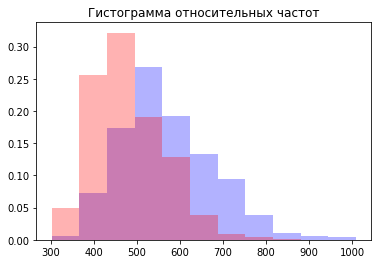

In [67]:
plt.hist(bins_1[1:], k_bins, weights = n_prob_1, density=False,  facecolor='blue', alpha=0.3)
plt.hist(bins_2[1:], k_bins, weights = n_prob_2, density=False,  facecolor='red', alpha=0.3)
plt.title("Гистограмма относительных частот")

In [72]:
def criterion_chi2_test_homogen():
    sum_ = 0
    for i in range(k_bins):
        sum_ += (n_1[i]/n_1.sum() - n_2[i]/n_2.sum())**2 / (n_1[i] + n_2[i])
    return n_1.sum() * n_2.sum() * sum_

In [86]:
display('crit', criterion_chi2_test_homogen())

'crit'

402.6320676583203

In [87]:
display('p-value', 1 - stats.chi2.cdf(criterion_chi2_test_homogen(), k_bins - 1))

'p-value'

0.0